In [2]:
import pandas as pd
import numpy as np
import  matplotlib.pyplot as plt

In [3]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install pmdarima-1.7.1-cp37-cp37m-win32.whl

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pmdarima as pm

In [6]:
%matplotlib inline

In [7]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [8]:
from statsmodels.tsa.arima_model import ARIMA

In [9]:
df= pd.read_csv("E:\SEM -3\FD\L & T.csv",index_col="Month",parse_dates=True)

In [10]:
df

,205-70-N1190,PC_198_27_42263,PC_203_32_51461,PC_600_863_4210,PC_6735_61_3410,D30141135,600-181-6740I.,07063-51210I.,600-319-4540I.,6735-51-5143I,07000-B2011I.
Month,,,,,,,,,,,
Apr-09,2013,0,0,1,0,457,381,435,231,578,10
May-09,1776,0,0,1,0,439,327,349,373,535,17
Jun-09,2092,0,0,0,0,404,389,339,112,540,38
Jul-09,1793,0,0,2,2,392,283,338,103,682,27
Aug-09,1829,15,0,0,0,403,310,389,223,634,32
Sep-09,1533,5,2,1,0,371,254,294,108,401,17
Oct-09,1693,15,0,3,0,382,287,322,216,440,19
Nov-09,2196,0,86,0,6,358,277,407,317,605,17
Dec-09,2184,0,0,0,0,594,291,432,258,558,21


In [11]:
df=df.dropna()
print('shape of data',df.shape)
df.head()

shape of data (49, 11)


,205-70-N1190,PC_198_27_42263,PC_203_32_51461,PC_600_863_4210,PC_6735_61_3410,D30141135,600-181-6740I.,07063-51210I.,600-319-4540I.,6735-51-5143I,07000-B2011I.
Month,,,,,,,,,,,
Apr-09,2013,0,0,1,0,457,381,435,231,578,10
May-09,1776,0,0,1,0,439,327,349,373,535,17
Jun-09,2092,0,0,0,0,404,389,339,112,540,38
Jul-09,1793,0,0,2,2,392,283,338,103,682,27
Aug-09,1829,15,0,0,0,403,310,389,223,634,32


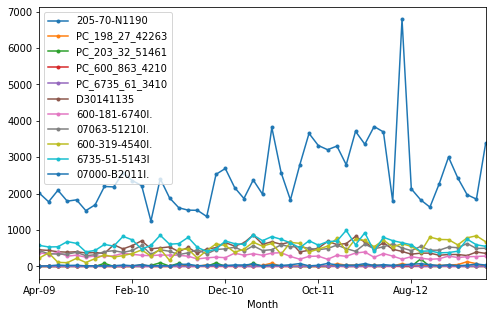

In [95]:
df.plot(figsize=(8,5),marker='.')

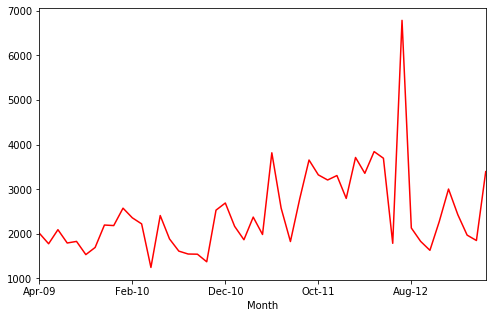

In [13]:
df["205-70-N1190"].plot(figsize=(8,5),color="red")

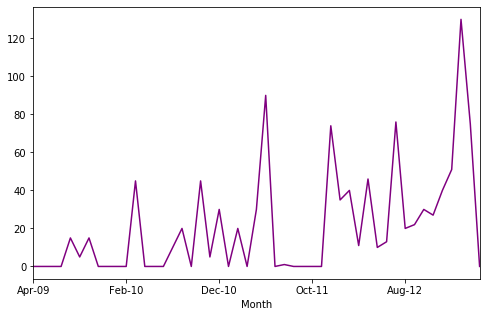

In [14]:
df['PC_198_27_42263'].plot(figsize=(8,5),color="purple")

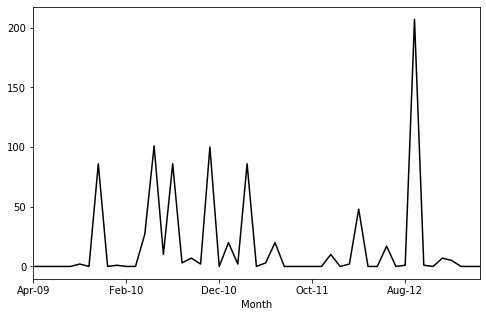

In [15]:
df['PC_203_32_51461'].plot(figsize=(8,5),color="black")

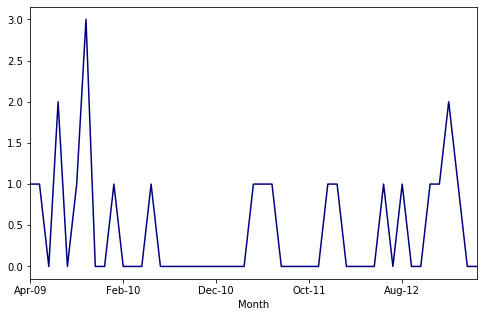

In [16]:
df['PC_600_863_4210'].plot(figsize=(8,5),color="navy")

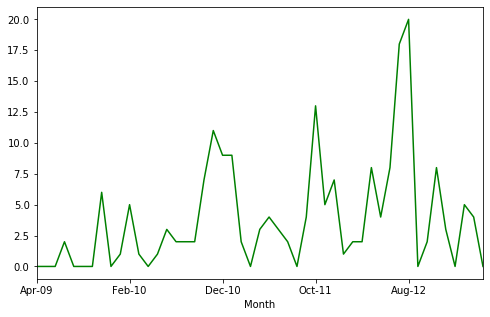

In [17]:
df['PC_6735_61_3410'].plot(figsize=(8,5),color="green")

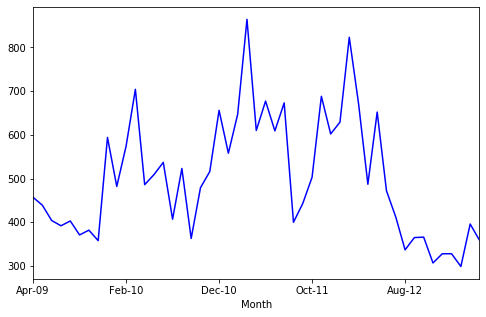

In [18]:
df['D30141135'].plot(figsize=(8,5),color="blue")

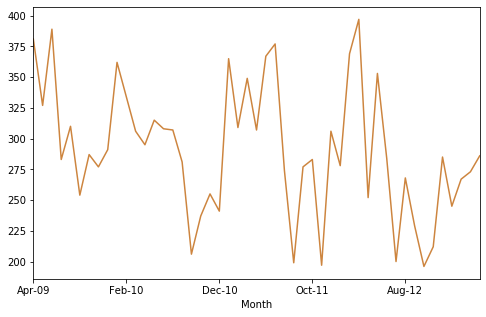

In [19]:
df['600-181-6740I.'].plot(figsize=(8,5),color="peru")

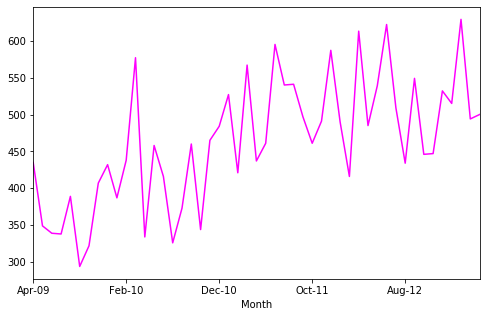

In [20]:
df['07063-51210I.'].plot(figsize=(8,5),color="magenta")

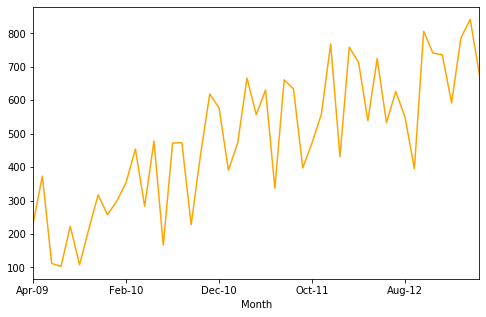

In [21]:
df['600-319-4540I.'].plot(figsize=(8,5),color="orange")

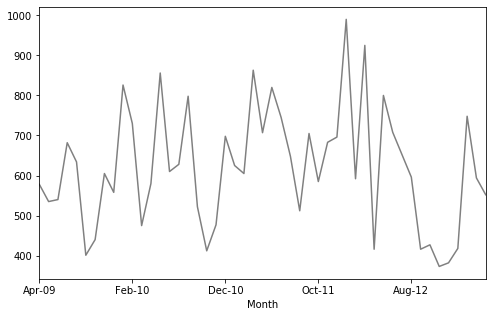

In [22]:
df['6735-51-5143I'].plot(figsize=(8,5),color="grey")

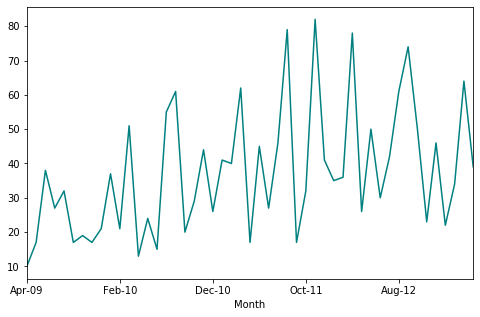

In [23]:
df['07000-B2011I.'].plot(figsize=(8,5),color="teal")

In [24]:
from statsmodels.tsa.stattools import adfuller

In [25]:
def ad_test(df):
    dftest= adfuller(df,autolag='AIC')
    print("1. ADF:",dftest[0])
    print("2. p-Value:",dftest[1])
    print("3. Num of Lags:",dftest[2])
    print("4. No of observation used for ADF Regression and Critical Values Calculation:",dftest[3])
    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

In [26]:
ad_test(df["205-70-N1190"])

1. ADF: -5.499315051161124
2. p-Value: 2.0886124359694823e-06
3. Num of Lags: 0
4. No of observation used for ADF Regression and Critical Values Calculation: 48
5. Critical Values:
	 1% : -3.5745892596209488
	 5% : -2.9239543084490744
	 10% : -2.6000391840277777


In [27]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [28]:
stepwise_fit = auto_arima(df["205-70-N1190"],trace=True,
                         suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=800.361, Time=1.55 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=820.587, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=806.454, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=794.890, Time=0.08 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=818.614, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=796.366, Time=0.16 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=796.238, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=798.670, Time=0.38 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=793.489, Time=0.05 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=794.745, Time=0.09 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=794.542, Time=0.09 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=804.520, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=796.096, Time=0.13 sec

Best model:  ARIMA(0,1,1)(0,0,0)[0]          
Total fit time: 3.181 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   49
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -394.745
Date:                Mon, 23 Nov 2020   AIC                            793.489
Time:                        23:19:26   BIC                            797.232
Sample:                             0   HQIC                           794.903
                                 - 49                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7958      0.089     -8.989      0.000      -0.969      -0.622
sigma2       7.97e+05   8.92e+04      8.933      0.000    6.22e+05    9.72e+05
===================================================================================
Ljung-Box (Q):                       22.33   Jarque-Bera (JB):                46.45
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):              10.84   Skew:                             0.99
Prob(H) (two-sided):                  0.00   Kurtosis:                         7.40
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [29]:
from statsmodels.tsa.arima_model import ARIMA

In [30]:
print(df.shape)
train=df.iloc[:-10]
test=df.iloc[:-39]
print(train.shape,test.shape)

(49, 11)
(39, 11) (10, 11)


In [31]:
model=ARIMA(train["205-70-N1190"],order=(0,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:         D.205-70-N1190   No. Observations:                   38
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -296.467
Method:                       css-mle   S.D. of innovations            582.827
Date:                Mon, 23 Nov 2020   AIC                            598.934
Time:                        23:19:27   BIC                            603.847
Sample:                             1   HQIC                           600.682
                                                                              
========================================================================================
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   38.3690     20.202      1.899      0.058      -1.227      77.965
ma.L1.D.205-70-N1190    -0.8239      0.144     -5.733      0.000      -1.105      -0.542
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.2138           +0.0000j            1.2138            0.0000
-----------------------------------------------------------------------------
"""

In [32]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]

38    3254.517910
39    3292.886922
40    3331.255934
41    3369.624946
42    3407.993958
43    3446.362971
44    3484.731983
45    3523.100995
46    3561.470007
47    3599.839019
dtype: float64


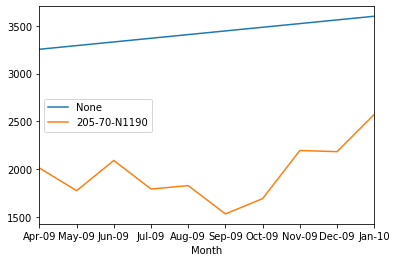

In [33]:
pred.plot(legend=True)
test["205-70-N1190"].plot(legend=True)

In [34]:
test['205-70-N1190'].mean()

1968.3

In [35]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse=sqrt(mean_squared_error(pred,test['205-70-N1190']))
print(rmse)

1481.1908649865084


In [36]:
model2=ARIMA(df['205-70-N1190'],order=(0,1,1))
model2=model2.fit()
df.tail()

,205-70-N1190,PC_198_27_42263,PC_203_32_51461,PC_600_863_4210,PC_6735_61_3410,D30141135,600-181-6740I.,07063-51210I.,600-319-4540I.,6735-51-5143I,07000-B2011I.
Month,,,,,,,,,,,
Dec-12,3003,40,7,1,3,328,285,532,736,382,46
Jan-13,2428,51,5,2,0,328,245,515,592,418,22
Feb-13,1970,130,0,1,5,299,267,629,786,748,34
Mar-13,1849,75,0,0,4,396,273,494,842,594,64
Apr-13,3394,0,0,0,0,359,286,500,676,552,39


In [37]:
index_future_dates=pd.date_range(start='2013-04-01',end='2014-03-31')
pred=model2.predict(start=len(df),end=len(df)+364,typ='levels').rename('ARIMA Predictions')
pred.index=index_future_dates

Text(0, 0.5, 'Prediction')

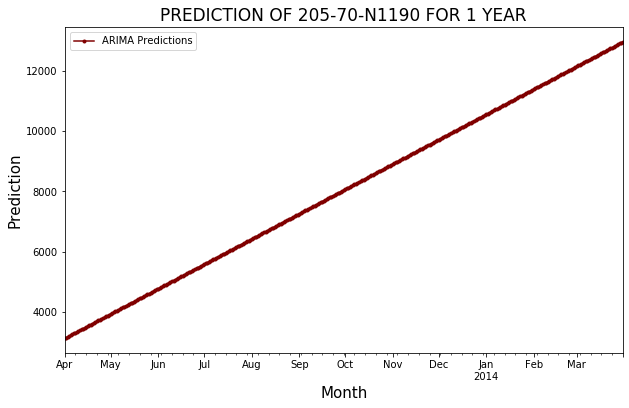

In [38]:
pred.plot(figsize=(10,6),legend=True,color='maroon',marker='.')
plt.title("PREDICTION OF 205-70-N1190 FOR 1 YEAR",fontsize=17)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Prediction",fontsize=15)

In [39]:
from statsmodels.tsa.stattools import adfuller

In [40]:
def ad_test(df):
    dftest= adfuller(df,autolag='AIC')
    print("1. ADF:",dftest[0])
    print("2. p-Value:",dftest[1])
    print("3. Num of Lags:",dftest[2])
    print("4. No of observation used for ADF Regression and Critical Values Calculation:",dftest[3])
    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

In [41]:
ad_test(df["PC_198_27_42263"])

1. ADF: 0.14753106318677792
2. p-Value: 0.9691603816743919
3. Num of Lags: 6
4. No of observation used for ADF Regression and Critical Values Calculation: 42
5. Critical Values:
	 1% : -3.596635636000432
	 5% : -2.933297331821618
	 10% : -2.6049909750566895


In [42]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [43]:
stepwise_fit = auto_arima(df["PC_198_27_42263"],trace=True,
                         suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=479.708, Time=0.00 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=474.244, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=477.708, Time=0.02 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=470.884, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=470.061, Time=0.08 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=469.442, Time=0.13 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=470.897, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.42 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.36 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.55 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=468.123, Time=0.11 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=468.482, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=469.709, Time=0.11 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   49
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -227.195
Date:                Mon, 23 Nov 2020   AIC                            458.390
Time:                        23:19:34   BIC                            462.133
Sample:                             0   HQIC                           459.804
                                 - 49                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8534      0.070    -12.273      0.000      -0.990      -0.717
sigma2       736.1721     96.326      7.642      0.000     547.376     924.968
===================================================================================
Ljung-Box (Q):                       66.99   Jarque-Bera (JB):                25.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.10   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [44]:
from statsmodels.tsa.arima_model import ARIMA

In [45]:
print(df.shape)
train=df.iloc[:-10]
test=df.iloc[:-39]
print(train.shape,test.shape)

(49, 11)
(39, 11) (10, 11)


In [46]:
model=ARIMA(train["PC_198_27_42263"],order=(0,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.PC_198_27_42263   No. Observations:                   38
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -170.570
Method:                       css-mle   S.D. of innovations             20.523
Date:                Mon, 23 Nov 2020   AIC                            347.140
Time:                        23:19:34   BIC                            352.052
Sample:                             1   HQIC                           348.888
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                       0.6538      0.292      2.239      0.025       0.082       1.226
ma.L1.D.PC_198_27_42263    -1.0000      0.069    -14.587      0.000      -1.134      -0.866
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0000           +0.0000j            1.0000            0.0000
-----------------------------------------------------------------------------
"""

In [47]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]

38    27.798583
39    28.452429
40    29.106276
41    29.760122
42    30.413968
43    31.067814
44    31.721660
45    32.375507
46    33.029353
47    33.683199
dtype: float64


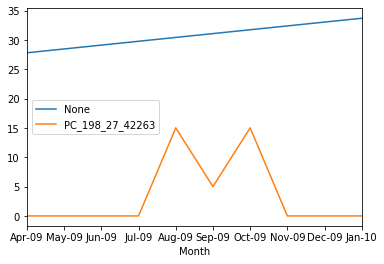

In [48]:
pred.plot(legend=True)
test["PC_198_27_42263"].plot(legend=True)

In [49]:
test['PC_198_27_42263'].mean()

3.5

In [50]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1=sqrt(mean_squared_error(pred,test['PC_198_27_42263']))
print(rmse1)

27.902592728521068


In [51]:
model2=ARIMA(df['PC_198_27_42263'],order=(0,1,1))
model2=model2.fit()
df.tail()

,205-70-N1190,PC_198_27_42263,PC_203_32_51461,PC_600_863_4210,PC_6735_61_3410,D30141135,600-181-6740I.,07063-51210I.,600-319-4540I.,6735-51-5143I,07000-B2011I.
Month,,,,,,,,,,,
Dec-12,3003,40,7,1,3,328,285,532,736,382,46
Jan-13,2428,51,5,2,0,328,245,515,592,418,22
Feb-13,1970,130,0,1,5,299,267,629,786,748,34
Mar-13,1849,75,0,0,4,396,273,494,842,594,64
Apr-13,3394,0,0,0,0,359,286,500,676,552,39


In [52]:
index_future_dates=pd.date_range(start='2013-04-01',end='2014-03-31')
pred1=model2.predict(start=len(df),end=len(df)+364,typ='levels').rename('ARIMA Predictions')
pred1.index=index_future_dates

Text(0, 0.5, 'Prediction')

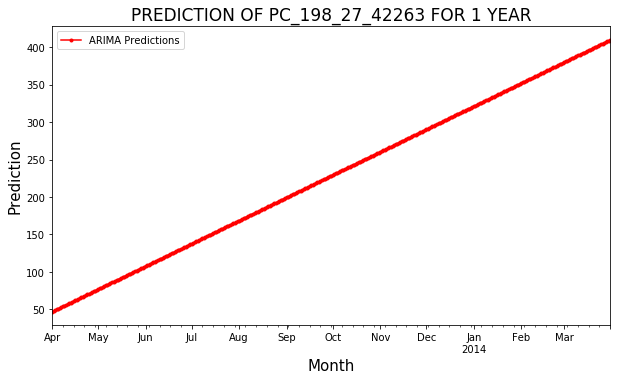

In [53]:
pred1.plot(figsize=(10,5.5),legend=True,color='red',marker='.')
#pred1.plot(figsize=(8,5),color="teal")
plt.title("PREDICTION OF PC_198_27_42263 FOR 1 YEAR",fontsize=17)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Prediction",fontsize=15)

In [54]:
from statsmodels.tsa.stattools import adfuller

In [55]:
def ad_test(df):
    dftest= adfuller(df,autolag='AIC')
    print("1. ADF:",dftest[0])
    print("2. p-Value:",dftest[1])
    print("3. Num of Lags:",dftest[2])
    print("4. No of observation used for ADF Regression and Critical Values Calculation:",dftest[3])
    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)

In [56]:
ad_test(df["PC_203_32_51461"])

1. ADF: -7.687436048114201
2. p-Value: 1.4490056525956441e-11
3. Num of Lags: 0
4. No of observation used for ADF Regression and Critical Values Calculation: 48
5. Critical Values:
	 1% : -3.5745892596209488
	 5% : -2.9239543084490744
	 10% : -2.6000391840277777


In [57]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [58]:
stepwise_fit = auto_arima(df["PC_198_27_42263"],trace=True,
                         suppress_warnings=True)
stepwise_fit.summary()

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=479.708, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=474.244, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.11 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=477.708, Time=0.00 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=470.884, Time=0.09 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=470.061, Time=0.09 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=469.442, Time=0.09 sec
 ARIMA(5,1,0)(0,0,0)[0] intercept   : AIC=470.897, Time=0.14 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.44 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.34 sec
 ARIMA(5,1,1)(0,0,0)[0] intercept   : AIC=inf, Time=0.49 sec
 ARIMA(4,1,0)(0,0,0)[0]             : AIC=468.123, Time=0.08 sec
 ARIMA(3,1,0)(0,0,0)[0]             : AIC=468.482, Time=0.06 sec
 ARIMA(5,1,0)(0,0,0)[0]             : AIC=469.709, Time=0.11 sec
 A

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   49
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -227.195
Date:                Mon, 23 Nov 2020   AIC                            458.390
Time:                        23:19:40   BIC                            462.133
Sample:                             0   HQIC                           459.804
                                 - 49                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.8534      0.070    -12.273      0.000      -0.990      -0.717
sigma2       736.1721     96.326      7.642      0.000     547.376     924.968
===================================================================================
Ljung-Box (Q):                       66.99   Jarque-Bera (JB):                25.90
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               7.10   Skew:                             1.33
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [59]:
from statsmodels.tsa.arima_model import ARIMA

In [60]:
print(df.shape)
train=df.iloc[:-10]
test=df.iloc[:-39]
print(train.shape,test.shape)

(49, 11)
(39, 11) (10, 11)


In [61]:
model=ARIMA(train["PC_203_32_51461"],order=(0,1,1))
model=model.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:      D.PC_203_32_51461   No. Observations:                   38
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -186.220
Method:                       css-mle   S.D. of innovations             30.984
Date:                Mon, 23 Nov 2020   AIC                            378.439
Time:                        23:19:41   BIC                            383.352
Sample:                             1   HQIC                           380.187
                                                                              
===========================================================================================
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                      -0.0982      0.441     -0.223      0.824      -0.962       0.766
ma.L1.D.PC_203_32_51461    -0.9998      0.131     -7.617      0.000      -1.257      -0.743
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0002           +0.0000j            1.0002            0.0000
-----------------------------------------------------------------------------
"""

In [62]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]

38    14.198341
39    14.100163
40    14.001986
41    13.903809
42    13.805632
43    13.707455
44    13.609277
45    13.511100
46    13.412923
47    13.314746
dtype: float64


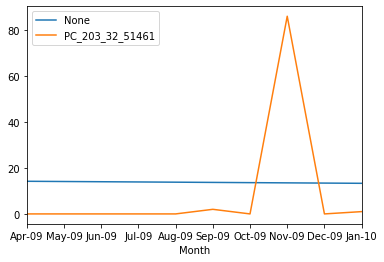

In [63]:
pred.plot(legend=True)
test["PC_203_32_51461"].plot(legend=True)

In [64]:
test['PC_203_32_51461'].mean()

8.9

In [65]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1=sqrt(mean_squared_error(pred,test['PC_203_32_51461']))
print(rmse1)

26.24662162156367


In [66]:
model2=ARIMA(df['PC_203_32_51461'],order=(0,1,1))
model2=model2.fit()
df.tail()

,205-70-N1190,PC_198_27_42263,PC_203_32_51461,PC_600_863_4210,PC_6735_61_3410,D30141135,600-181-6740I.,07063-51210I.,600-319-4540I.,6735-51-5143I,07000-B2011I.
Month,,,,,,,,,,,
Dec-12,3003,40,7,1,3,328,285,532,736,382,46
Jan-13,2428,51,5,2,0,328,245,515,592,418,22
Feb-13,1970,130,0,1,5,299,267,629,786,748,34
Mar-13,1849,75,0,0,4,396,273,494,842,594,64
Apr-13,3394,0,0,0,0,359,286,500,676,552,39


In [67]:
index_future_dates=pd.date_range(start='2013-04-01',end='2014-03-31')
pred1=model2.predict(start=len(df),end=len(df)+364,typ='levels').rename('ARIMA Predictions')
pred1.index=index_future_dates

Text(0, 0.5, 'Numbers')

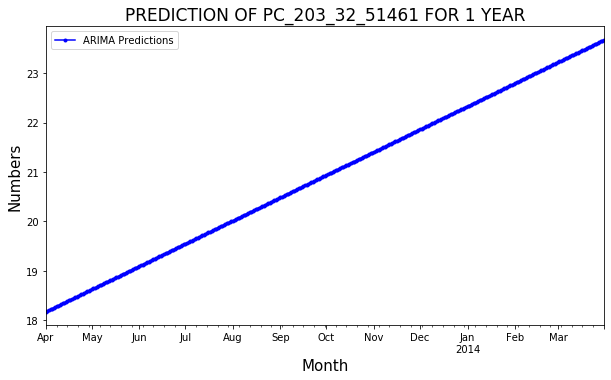

In [68]:
pred1.plot(figsize=(10,5.5),legend=True,color='blue',marker='.')
#pred1.plot(figsize=(8,5),color="teal")
plt.title("PREDICTION OF PC_203_32_51461 FOR 1 YEAR",fontsize=17)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Numbers",fontsize=15)

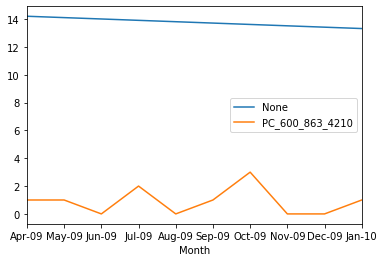

In [69]:
pred.plot(legend=True)
test["PC_600_863_4210"].plot(legend=True)

In [70]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1=sqrt(mean_squared_error(pred,test['PC_600_863_4210']))
print(rmse1)

12.893051250608616


In [71]:
model2=ARIMA(df['PC_600_863_4210'],order=(0,1,1))
model2=model2.fit()
df.tail()

,205-70-N1190,PC_198_27_42263,PC_203_32_51461,PC_600_863_4210,PC_6735_61_3410,D30141135,600-181-6740I.,07063-51210I.,600-319-4540I.,6735-51-5143I,07000-B2011I.
Month,,,,,,,,,,,
Dec-12,3003,40,7,1,3,328,285,532,736,382,46
Jan-13,2428,51,5,2,0,328,245,515,592,418,22
Feb-13,1970,130,0,1,5,299,267,629,786,748,34
Mar-13,1849,75,0,0,4,396,273,494,842,594,64
Apr-13,3394,0,0,0,0,359,286,500,676,552,39


In [72]:
index_future_dates=pd.date_range(start='2013-04-01',end='2014-03-31')
pred1=model2.predict(start=len(df),end=len(df)+364,typ='levels').rename('ARIMA Predictions')
pred1.index=index_future_dates

Text(0, 0.5, 'Numbers')

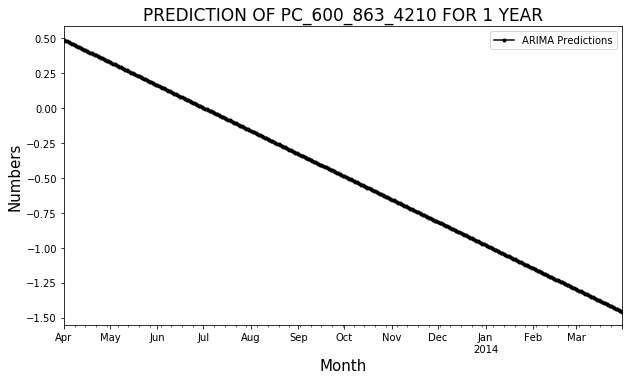

In [73]:
pred1.plot(figsize=(10,5.5),legend=True,color='black',marker='.')
#pred1.plot(figsize=(8,5),color="teal")
plt.title("PREDICTION OF PC_600_863_4210 FOR 1 YEAR",fontsize=17)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Numbers",fontsize=15)

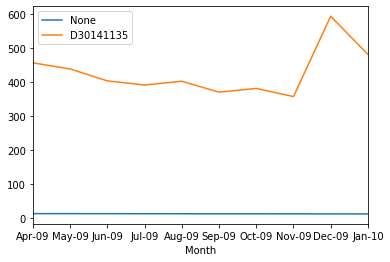

In [74]:
pred.plot(legend=True)
test["D30141135"].plot(legend=True)

In [75]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1=sqrt(mean_squared_error(pred,test['D30141135']))
print(rmse1)

419.753514357348


In [76]:
model2=ARIMA(df['D30141135'],order=(0,1,1))
model2=model2.fit()
df.tail()

,205-70-N1190,PC_198_27_42263,PC_203_32_51461,PC_600_863_4210,PC_6735_61_3410,D30141135,600-181-6740I.,07063-51210I.,600-319-4540I.,6735-51-5143I,07000-B2011I.
Month,,,,,,,,,,,
Dec-12,3003,40,7,1,3,328,285,532,736,382,46
Jan-13,2428,51,5,2,0,328,245,515,592,418,22
Feb-13,1970,130,0,1,5,299,267,629,786,748,34
Mar-13,1849,75,0,0,4,396,273,494,842,594,64
Apr-13,3394,0,0,0,0,359,286,500,676,552,39


In [77]:
index_future_dates=pd.date_range(start='2013-04-01',end='2014-03-31')
pred2=model2.predict(start=len(df),end=len(df)+364,typ='levels').rename('ARIMA Predictions')
pred2.index=index_future_dates

Text(0, 0.5, 'Numbers')

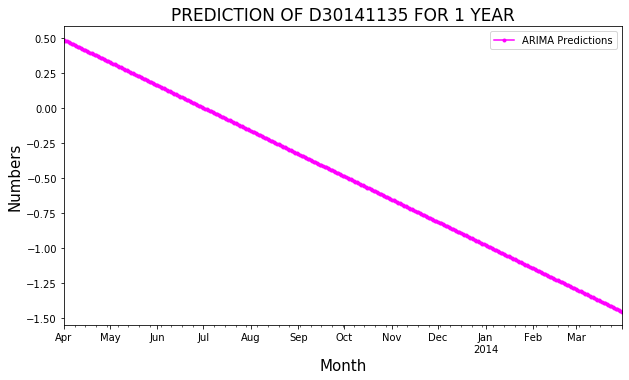

In [78]:
pred1.plot(figsize=(10,5.5),legend=True,color='magenta',marker='.')
#pred1.plot(figsize=(8,5),color="teal")
plt.title("PREDICTION OF D30141135 FOR 1 YEAR",fontsize=17)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Numbers",fontsize=15)

In [79]:
from statsmodels.tsa.stattools import adfuller

In [80]:
def ad_test(df):
    dftest= adfuller(df,autolag='AIC')
    print("1. ADF:",dftest[0])
    print("2. p-Value:",dftest[1])
    print("3. Num of Lags:",dftest[2])
    print("4. No of observation used for ADF Regression and Critical Values Calculation:",dftest[3])
    print("5. Critical Values:")
    for key, val in dftest[4].items():
        print("\t",key,":",val)


In [81]:
ad_test(df["600-181-6740I."])

1. ADF: -4.921647689443199
2. p-Value: 3.1644037301759836e-05
3. Num of Lags: 0
4. No of observation used for ADF Regression and Critical Values Calculation: 48
5. Critical Values:
	 1% : -3.5745892596209488
	 5% : -2.9239543084490744
	 10% : -2.6000391840277777


In [82]:
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')


In [83]:
stepwise_fit = auto_arima(df["600-181-6740I."],trace=True,
                         suppress_warnings=True)
stepwise_fit.summary()


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=530.807, Time=0.34 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=532.222, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=527.870, Time=0.08 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=529.526, Time=0.08 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=698.583, Time=0.00 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=528.723, Time=0.09 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=529.490, Time=0.09 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=530.705, Time=0.23 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=547.438, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 0.985 seconds


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   49
Model:               SARIMAX(1, 0, 0)   Log Likelihood                -260.935
Date:                Mon, 23 Nov 2020   AIC                            527.870
Time:                        23:19:47   BIC                            533.545
Sample:                             0   HQIC                           530.023
                                 - 49                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    187.9717     43.302      4.341      0.000     103.102     272.842
ar.L1          0.3557      0.145      2.447      0.014       0.071       0.641
sigma2      2464.5504    617.297      3.992      0.000    1254.671    3674.430
===================================================================================
Ljung-Box (Q):                       45.59   Jarque-Bera (JB):                 1.03
Prob(Q):                              0.25   Prob(JB):                         0.60
Heteroskedasticity (H):               1.90   Skew:                             0.10
Prob(H) (two-sided):                  0.21   Kurtosis:                         2.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [84]:
start=len(train)
end=len(train)+len(test)-1
pred=model.predict(start=start,end=end,typ='levels')
print(pred)
pred.index=df.index[start:end+1]


38    14.198341
39    14.100163
40    14.001986
41    13.903809
42    13.805632
43    13.707455
44    13.609277
45    13.511100
46    13.412923
47    13.314746
dtype: float64


In [85]:
from statsmodels.tsa.arima_model import ARIMA

In [86]:
print(df.shape)
train=df.iloc[:-10]
test=df.iloc[:-39]
print(train.shape,test.shape)


(49, 11)
(39, 11) (10, 11)


In [87]:
model=ARIMA(train["600-181-6740I."],order=(0,1,1))
model=model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:       D.600-181-6740I.   No. Observations:                   38
Model:                 ARIMA(0, 1, 1)   Log Likelihood                -205.535
Method:                       css-mle   S.D. of innovations             51.507
Date:                Mon, 23 Nov 2020   AIC                            417.070
Time:                        23:19:48   BIC                            421.983
Sample:                             1   HQIC                           418.818
                                                                              
==========================================================================================
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                     -0.4709      0.733     -0.643      0.521      -1.907       0.965
ma.L1.D.600-181-6740I.    -0.9999      0.096    -10.391      0.000      -1.189      -0.811
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            1.0001           +0.0000j            1.0001            0.0000
-----------------------------------------------------------------------------
"""

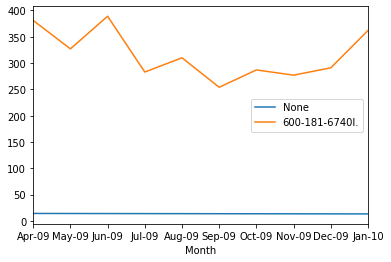

In [88]:
pred.plot(legend=True)
test["600-181-6740I."].plot(legend=True)

In [89]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse1=sqrt(mean_squared_error(pred,test['600-181-6740I.']))
print(rmse1)

305.5752813476227


In [90]:
model2=ARIMA(df['600-181-6740I.'],order=(0,1,1))
model2=model2.fit()
df.tail()

,205-70-N1190,PC_198_27_42263,PC_203_32_51461,PC_600_863_4210,PC_6735_61_3410,D30141135,600-181-6740I.,07063-51210I.,600-319-4540I.,6735-51-5143I,07000-B2011I.
Month,,,,,,,,,,,
Dec-12,3003,40,7,1,3,328,285,532,736,382,46
Jan-13,2428,51,5,2,0,328,245,515,592,418,22
Feb-13,1970,130,0,1,5,299,267,629,786,748,34
Mar-13,1849,75,0,0,4,396,273,494,842,594,64
Apr-13,3394,0,0,0,0,359,286,500,676,552,39


In [91]:
index_future_dates=pd.date_range(start='2013-01-01',end='2014-01-01')
pred2=model2.predict(start=len(df),end=len(df)+365,typ='levels').rename('ARIMA Predictions')
pred2.index=index_future_dates

Text(0, 0.5, 'Numbers')

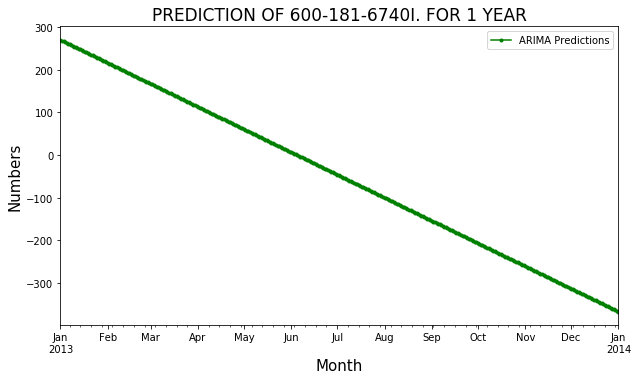

In [92]:
pred2.plot(figsize=(10,5.5),legend=True,color='green',marker='.')
#pred1.plot(figsize=(8,5),color="teal")
plt.title("PREDICTION OF 600-181-6740I. FOR 1 YEAR",fontsize=17)
plt.xlabel("Month",fontsize=15)
plt.ylabel("Numbers",fontsize=15)